# Taller

Responder las preguntas de analítica acerca de la base de datos de IMDB que se encuentran a lo largo de este documento. Modifique el nombre de este archivo por el número de su documento (123456789.ipynb) y adjúntelo como parte de los entregables del taller.

Nombre: 



### Descargar los datos:
- Tabla de películas
- Archivo .shp y archivos auxiliares con la información necesaria para pintar el mapa

Estos archivos quedarán en la carpeta _/content/IMDBAnalyticsData/_ asociada con el sistema operativo del servidor en el que se está ejecutando google colab. 

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr' -O data
!unzip "/content/data" -d "/content/IMDBAnalyticsData/"


--2023-03-02 14:44:43--  https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr
Resolving docs.google.com (docs.google.com)... 142.251.111.139, 142.251.111.101, 142.251.111.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.111.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g4cn72udb2lranpu129o74e0ebjbmrk1/1677768225000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=165023b5-1df4-4323-94c7-420322deee1b [following]
--2023-03-02 14:44:44--  https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g4cn72udb2lranpu129o74e0ebjbmrk1/1677768225000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=165023b5-1df4-4323-94c7-420322deee1b
Resolving doc-14-6c-docs.googleusercontent.com (doc-14-6c-docs.googleusercontent.com)... 142.251.163.132, 2607:


### Importar las librerías necesarias

La libreia geopandas, que sirve para el procesamiento de archivos con información geográfica (shapefiles) no está instalada por defecto en el ambiente de google colab. Por esta razón, debe instalarla

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 70.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Información básica de la tabla de películas

In [51]:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv')
df.head()
df.columns.values

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

**Pregunta 1**

Utilice histogramas para comparar la distribución de la columna _imdb_score_ relacionada con películas producidas en Francia y Canadá.

Para crear el histograma:

- Ajuste el número de _bins_ a 20
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

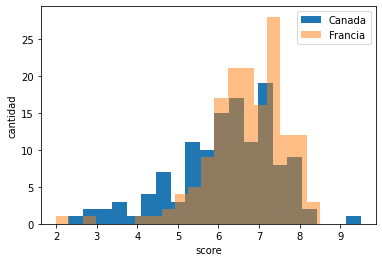

In [33]:
#dataframe1 = df[df["country"] == ("Canada" or "France")][["country", "imdb_score"]]
dataframeCanada = df[df["country"] == ("Canada")][["country", "imdb_score"]]
dataframeFrance = df[df["country"] == ("France")][["country", "imdb_score"]]
ax = dataframeCanada["imdb_score"].hist(bins = 20, label = "Canada")
ax.set_xlabel('score')
ax.set_ylabel('cantidad')

ax = dataframeFrance["imdb_score"].hist(bins = 20, alpha = 0.5, label = "Francia")
ax.set_xlabel('score')
ax.set_ylabel('cantidad')

plt.legend()
plt.grid(False)


**Pregunta 2**

Cree un histograma para mirar la distribución de la columna _imdb_score_ de las películas producidas en blanco y negro.

Para crear el histograma:

- Ajuste el número de _bins_ a 10
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

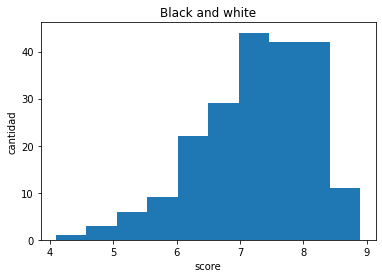

In [43]:
df['color'].unique()
dataframeBN = df[df["color"] == (" Black and White")][["color", "imdb_score"]]
ax = dataframeBN["imdb_score"].hist(bins = 10,)
ax.set_title("Black and white")
ax.set_xlabel('score')
ax.set_ylabel('cantidad')

plt.grid(False)



**Pregunta 3**

¿Qué país tiene el mayor promedio de calificación de películas? Utilice figuras de barras para visualizar los resultados.  



El pais con mayor promedio de calificaciones es Kyrgyzstan


Text(0, 0.5, 'Promedio de Calificacion')

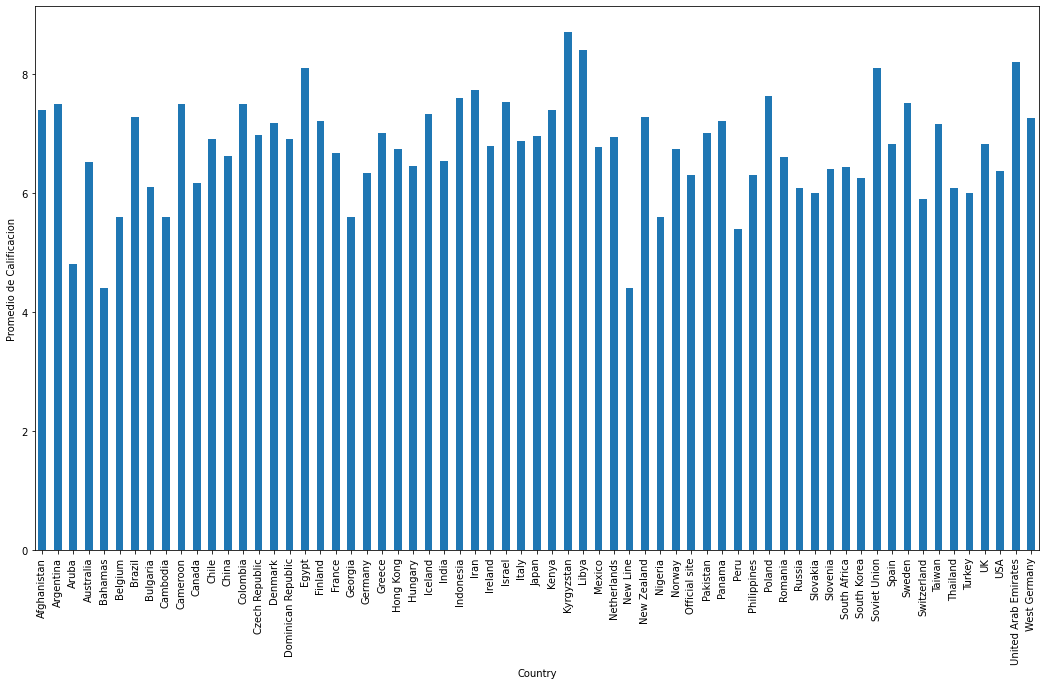

In [92]:
df_Cal = df.groupby('country')['imdb_score'].mean()
 

print(f"El pais con mayor promedio de calificaciones es {df_Cal.idxmax()}")
 
ax = df_Cal.plot.bar(figsize = (18,10))
ax.set_xlabel("Country")
ax.set_ylabel("Promedio de Calificacion")

**Pregunta 4** 

¿Cuántas películas a blanco y negro y cuántas películas a color se tienen en la base de datos?


In [48]:
dataframeColor = df[df["color"] == ("Color")]
print("Peliculas ByN: ", len(dataframeBN))
print("Peliculas Color: ", len(dataframeColor))

Peliculas ByN:  209
Peliculas Color:  4815


**Pregunta 5**

¿Cuál película de Christopher Nolan tiene la mayor calificación (_imdb_score_)? Utilice figuras de barras para visualizar los resultados.

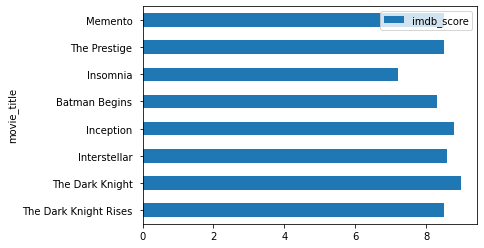

In [67]:
dataframeCH = df[df["director_name"] == ("Christopher Nolan")][["movie_title", "imdb_score"]]
len(dataframeCH)
dataframeCH
ax = dataframeCH.plot.barh(x='movie_title', y='imdb_score')

**Pregunta 6**

Utilice un _line chart_ para visualizar cuántas películas se produjeron en USA desde el 2010 hasta el 2015.

<AxesSubplot:title={'center':'Peliculas producidad por año'}>

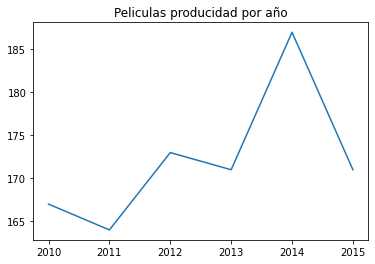

In [88]:
dataUSA = df[df["country"] == ("USA")]
datayearE= dataUSA[dataUSA['title_year'].between(2010, 2015)]
datayearCount = datayearE['title_year'].value_counts().sort_index()
datayearCount.plot.line(x = "title_year", title = "Peliculas producidad por año")

**Pregunta 7**

Grafique en un mapa el _imdb_score_ promedio de las películas producidas en cada país.

In [ ]:
shpfile = 'IMDBAnalyticsData/Data/Map/ne_10m_admin_0_countries.shp'
geo_df = gpd.read_file(shpfile)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']

geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

df_moviebyc = df.groupby('country').size().to_frame('# of movies')

df_Cal = df.groupby('country')['imdb_score'].mean()

df_mbc_shp = pd.merge(left=geo_df, right=df_moviebyc, how='left', left_on='country', right_on='country')

fig = px.choropleth_mapbox(df_mbc_shp,
                           geojson=df_mbc_shp.geometry,
                           locations=df_mbc_shp.index,
                           color="# of movies",
                           mapbox_style="open-street-map",
                           opacity = 0.5,
                           zoom=8.5)
fig.show()
df_Cal

**Pregunta 8**

¿Qué información de su proyecto podría utilizar para hacer analítica de datos?


In [ ]:
ningunaaaaa